## <span style="color:red">Firing Rate and Spike Train Statistics</span>

As you recall form the [Gerstner reading](https://neuronaldynamics.epfl.ch/online/Ch7.html), there are several ways to think about a neuron's firing rate. In the first part of this lab, we will calculate the Fano Factor as well as the Interspike Interval of the neuron.

Note: Because we will be using data from a single neuron, we will omit the population method.

<img src="image1.png" alt="drawing" width="400"/>

The data we will be using was collected from de Ruyter van Stevenick from a blow fly (Calliphora erytrocephela) H1 visual neuron responding to a white noise visual motion stimulus. They recorded the neuron at 500 Hz (in other words, each sample represents 2 ms). Within the file, $rho$ is a boolean vector where 1 denotes a spike and $stim$ is a variable indicating the intensity of the visual stimulus (in this case, the angular velocity of the random moving dots). We will only be using the rho vector today, but we will return to this data set next week.

In [7]:
# Importing packages to load data
import csv
import numpy as np

# Loading data
with open('/home/jovyan/Labs/Lab5_FiringRate/H1/rho.csv') as f:
    # storing data to a variable called rho
    rho = list(csv.reader(f))

# Converting the file to an array of floats
rho = np.array(rho[:], dtype=np.float)

The most straightforward method for computing a neuron's firing rate is the **spike count rate**. Here, we simply count the number of spikes and divide by the interval of time:

\begin{equation*}
r = \frac{n_{spikes}}{time}
\end{equation*}

Compute the spike count rate in spikes per second (Hz) for the entire duration of the recording.

In [1]:
# Your code here

We can characterize this neuron by its Fano factor. Recall that this is the variance of the spike count rate over its mean:

\begin{equation*}
F = \frac{{\sigma_{sp}}^2}{\mu_{sp}}
\end{equation*}

In order to get the mean and variability, break the recording up into non-overlapping one-second intervals, and calculate the spike count rate in each interval. From this data, compute the mean, variance, and Fano factor.

Hint: You are going to need 2 counting variables, one for indexing rho, and the other for indexing 

In [2]:
# your code here

If implemented properly, you should come up with a Fano factor of $\approx$ 6.23.

Another way to characterize the neuron's firing pattern is to examine the distribution of interspike intervals (ISI). Unlike the Hodgkin and Huxley model that fired spikes at a constant pace, real neurons have some variability. Calculate the ISI distribution for this dataset.

In [9]:
import matplotlib.pyplot as plt
# Find the index of spikes in rho

# Initialize data structure
isi = np.zeros()

# Initialize counter for indexing
x = 0
# For-loop to calculate the ISI
for i in range():


# plot thisInterval in a histogram
plt.figure()
plt.hist(isi,100);

IndentationError: expected an indented block (<ipython-input-9-fd0358073c1c>, line 14)

Based on your ISI and Fano results, does this neuron appear to be well-modeled by a Poisson process? Justify your answer as a comment below.

In [21]:
# Answer:

Let's now compare this to an actual Poisson process. In this exercise, we'll be creating our own artificial spike train. Recall that for a Poisson process, the probability of a spike occuring in some small time interval $t$ is:

\begin{equation*}
\frac{\lambda^ke^-\lambda}{k!}
\end{equation*}

Create a Poisson spike generator that simulates a neuron that spikes at a constant rate of $45 Hz$. Your simulator should sample $1000 Hz$. Run your simulator for 1000 runs of 1 second each, and record the spikes in a single matrix. Compute the following:
- A histogram of spike count rate
- A histogram of interspike intervals
- Fano factor for spike counts obtained over the 1000 runs.

In [5]:
# Define probability of a spike occuring

# Initiate data structure to hold the spikes
spikeMatrix = np.zeros()
# Create loop to simulate 1000 trials of 1000 samples: 
for i in range():
    for j in range():
        # Conditional to assign a spike to spikeMatrix
        if np.random.rand() < :
            # Store a 1 in spikeMatrix
            
# Calculate number of spikes
spikeCountRates = 

# Set up data stuctures
isi = np.zeros()
# Initiate counter
count = 0
# Create a loop which finds the spikes in spikeMatrix 
for i in range():
    # Find indices of spikes
    for j in range(len(spikes)-1):
        # Calculate ISI and store in vector

# Plotting
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.hist(spikeCountRates,40,edgecolor='black');
plt.subplot(2,1,2)
plt.hist(isi,100);

# Calculate Fano factor
Fano2 = 
print(Fano2)

SyntaxError: invalid syntax (<ipython-input-5-aefea7fc0938>, line 9)

In other applications, we want to be able to express the neuron's firing rate as a more continuous value. If we had multiple trials, we could create  **peri-stimulus-time histogram** as described in your reading. However, our dataset reflects a continuous recording with only one "trial". However, we can move from discrete to continuous by examining the spike-count rate in smaller and smaller windows

Use a 5-point sliding window to compute a continuous firing rate function. Your first point will reflect the spike-count rate of the first five points of $rho$. Your second point will reflect the spike-count rate of points 2-6, etc. Pay attention to the end of the recording: your loop will truncate five time points before the end. Plot the first 1000 points of your function.

In [3]:
# Initialize data structure
smoothRate = np.zeros()

for i in range():
    # Calculate firing rate in each window and store in smoothRate
    
# Plotting
plt.plot(smoothRate[1:1000])

IndentationError: expected an indented block (<ipython-input-3-8fe4fe50eb8b>, line 8)

One issue with the code that you just created is that it has a time lag: your first datapoint in your smoothed function reflects the neuron's activity up to 10 ms in the future! To reduce the time delay, we can express each smoothed point as the *center* of five points in $rho$.

Hint: You will need to truncate both the beginning and end of the recording window.

In [10]:
# Initialize data structure
smoothRate2 = np.zeros()

for i in range():
    # Calculate firing rate in each window and store in smoothRate2

# Plotting
plt.plot(smoothRate2[1:1000])

IndentationError: expected an indented block (<ipython-input-10-b8ccde12c48c>, line 7)

Now, run the following line and compare this result with the one that you just wrote:

In [12]:
smoothRate3 = np.convolve(rho[1:1000,0], [.2, .2, .2, .2, .2])

# Plotting
plt.plot(smoothRate3[1:1000])

NameError: name 'plt' is not defined

In [10]:
# Answer: 

Congratulations - you just ran your first convolution by hand! Although the word sounds intimidating, you can think of a convolution as a weighted average between one vector called *signal*, and another called the *kernel*. (Not related to iPython kernels)

<img src="image2.png" alt="drawing" width="300"/>

In the previous example, the kernel is [.2, .2, .2, .2, .2] indicating that each of the five points contributes equally to the resulting vector. One can change these weights to decrease the influence of data points that are further in the past or future.


In your 5-point moving window, you will see that there are only a few different firing rates represented. Why is this?

In [11]:
# Answer:

Create two new smoothed firing rate vectors, one using 11-point moving window, and the other using a 51-point moving window. Examine the histograms of each.

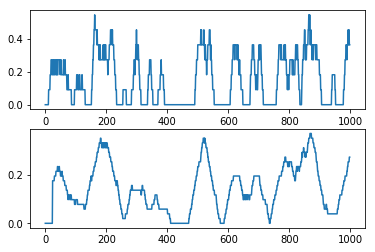

In [108]:
# your code here
# 11 point window
# Initialize data structure
smoothRate4 = np.zeros()
for i in range():
    # Calculate firing rate in each window and store in smoothRate4

# 51 point window
# Initialize data structure
smoothRate5 = np.zeros()
for i in range():
    # Calculate firing rate in each window and store in smoothRate5

# Plotting
plt.figure()
plt.subplot(2,1,1)
plt.plot(smoothRate4[1:1000])
plt.subplot(2,1,2)
plt.plot(smoothRate5[1:1000])

In a comment, discuss the relative advantages and disadvantages of each in 2-3 sentences

In [ ]:
# Answer:

One thing we might want to do is the measure the degree of randomness in a spike train (whether it is a real spike train like rho or a simulated one like you Poisson model). One way of doing this is with an <u>autocorrelation function</u>. This refers to looking at the correlation between a time series and a time-shifted version of itself from both the past and the future. It tells us how similar the data is to itself over time (a random process will not have any self-similarity). To understand autocorrelation, we must first recall the definition of correlation:

\begin{equation*}
r = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}
\end{equation*}

Where the summations are over observations, and $\overline{x}$ and $\overline{y}$ are the mean of $x$ and $y$ respectively.

Whereas correlation measures the association between two variables $x$ and $y$, the autocorrelation measures the association between variable x and a time-shifted version of itself. For example, in a first-order autocorrelation, the time lag is 1:

\begin{equation*}
r_1 = \frac{\sum_{i=1}^{N-1}(x_i-\bar{x})(x_{i+1}-\bar{x})}{\sum_{i=1}^{N}(x_i-\bar{x})^2}
\end{equation*}

For any vector length m, the autocorrelation function will be length $2*m+1$ and will cover all possible lags.

Use the **plt.xcorr(**_array1, array2_**)** function to compute the autocorrelation of the rho vector.

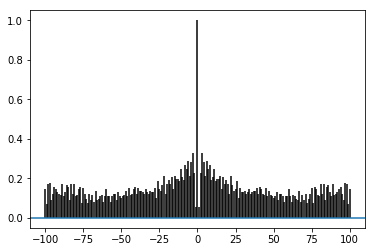

In [111]:
# Making rho 1-Dimensional
rho1 = rho[:,0]

plt.xcorr(rho1[:1000], rho1[:1000], maxlags=100);

What does the resulting figure mean? How might we intepret the peak (what its value represents and where it is located in the function)? Why are there lower values on either side of the peak?

In [26]:
# Answer:

Finally, use **plt.xcorr(**_array1, array2_**)** on a Poisson spike train and compare the results to what you saw in the previous autocorrelation function. In a comment, tell me what evidence you see from the graph that the Poisson spike train is more random than the H1 spike train. 

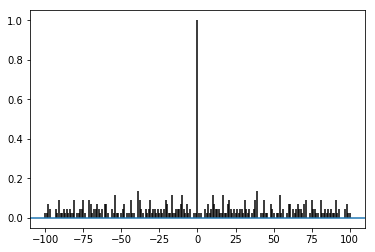

In [112]:
# Create vector of random numbers

# Create boolean vector of spikes

# Get indices of spikes

# Initializing data structure
poisson1 = np.zeros()
# Save  spikes in poisson1 vector

# Plotting
plt.xcorr(poisson1[:1000],poisson1[:1000], maxlags=100);

# Answer:

Great work today! As always, please leave this saved in your Etna folder for grading.